Import các thư viện dùng để lấy nội dung và phân tích cú pháp HTML

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

Crawl data  
    - Crawl tiếp dữ liệu sau 10/4/2024 14h20 đến 24/5/2024  
    - Thêm 1 cột Date để thể hiện ngày cụ thể  

In [5]:
new_data = []
for i in range(1, 42):
    url = "https://nhadat24h.net/nha-dat-da-nang/page" + str(i)
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    properties = soup.find_all("div", class_="pn1")
    for prop in properties:
        bed = ''
        wc = ''
        # Mặt tiền
        i_arrows = prop.find('i', class_="fas fa-arrows-alt")
        if i_arrows:
            span_content_arrows = i_arrows.find_next_sibling(string=True).strip()
            arrows = re.search(r'\d+', span_content_arrows).group()
        else: continue
        # Số phòng ngủ
        i_bed = prop.find('i', class_="fas fa-bed")
        if i_bed:
            span_content_bed = i_bed.find_next_sibling(string=True).strip()
            bed = re.search(r'\d+', span_content_bed).group()
        # WC
        i_wc = prop.find('i', class_="fas fa-bath")
        if i_wc:
            span_content_wc = i_wc.find_next_sibling(string=True).strip()
            wc = re.search(r'\d+', span_content_wc).group()
        # Giá nhà
        price = prop.find("label", class_="a-txt-cl1").text.strip()
        if price == "Thỏa thuận": 
            continue
        # Diện tích
        found_area = prop.find("label", class_="a-txt-cl2").text.strip()
        area = re.search(r'\d+', found_area).group()
        # Khu vực
        location = prop.find("label", class_="rvVitri").text.strip()
        # Mô tả vị trí
        detail_location = prop.find("span", class_="ex3").text.strip()
        detail_location_lower = detail_location.lower()
        if "nhà đất thổ cư" in detail_location_lower:
            if bed == "" and wc == "":
                continue
        word_to_include = ["nhà", "căn hộ", "condotel"]
        words_to_check = ["nhà hàng", "trọ", "xưởng"]
        if not any(word in detail_location_lower for word in word_to_include) or any(word in detail_location_lower for word in words_to_check):
            continue
        date = prop.find("p", class_="time").text.strip()
        new_data.append([price, area, location, detail_location, arrows, bed, wc, date])

In [8]:
data = pd.DataFrame(new_data, columns=["Giá nhà", "Diện tích (m^2)", "Khu vực", "Mô tả vị trí", "Mặt tiền (m)", "Số phòng ngủ", "WC", "Ngày đăng"])
data

,Giá nhà,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Ngày đăng
0,2.2 Tỷ,46,"Phường Nại Hiên Đông, Quận Sơn Trà",Căn hộ chung cư,15,1,1,17 phút trước.
1,13.42 Tỷ,433,"Phường Hòa Hải, Quận Ngũ Hành Sơn","Nhà biệt thự, liền kề",15,4,4,1 giờ 3 phút trước.
2,4.3 Tỷ,100,"Phường Hòa Quý, Quận Ngũ Hành Sơn",Nhà đất thổ cư,5,3,,2 ngày trước.
3,9.9 Tỷ,64,"Phường Hòa Thuận Tây, Quận Hải Châu",Nhà mặt phố,6,3,3,2 ngày trước.
4,12.9 Tỷ,180,", Quận Sơn Trà","Nhà biệt thự, liền kề",10,4,4,9 ngày trước.
...,...,...,...,...,...,...,...,...
215,18 Tỷ,140,"Phường An Hải Tây, Quận Sơn Trà",Nhà mặt phố,5,8,10,"11/4/2024, lúc: 9 giờ 43 phút"
216,22 Tỷ,250,"Phường An Hải Tây, Quận Sơn Trà","Nhà biệt thự, liền kề",10,4,6,"11/4/2024, lúc: 9 giờ 43 phút"
217,5 Tỷ,87,"Phường Nại Hiên Đông, Quận Sơn Trà",Nhà mặt phố,4,4,2,"10/4/2024, lúc: 21 giờ 30 phút"
218,6 Tỷ,140,"Phường Hòa Thuận Tây, Quận Hải Châu",Nhà mặt phố,6,5,5,"10/4/2024, lúc: 21 giờ 4 phút"


#### Bỏ cột Ngày đăng

In [13]:
data = data.drop(labels="Ngày đăng", axis=1)
data

,Giá nhà,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC
0,2.2 Tỷ,46,"Phường Nại Hiên Đông, Quận Sơn Trà",Căn hộ chung cư,15,1,1
1,13.42 Tỷ,433,"Phường Hòa Hải, Quận Ngũ Hành Sơn","Nhà biệt thự, liền kề",15,4,4
2,4.3 Tỷ,100,"Phường Hòa Quý, Quận Ngũ Hành Sơn",Nhà đất thổ cư,5,3,
3,9.9 Tỷ,64,"Phường Hòa Thuận Tây, Quận Hải Châu",Nhà mặt phố,6,3,3
4,12.9 Tỷ,180,", Quận Sơn Trà","Nhà biệt thự, liền kề",10,4,4
...,...,...,...,...,...,...,...
215,18 Tỷ,140,"Phường An Hải Tây, Quận Sơn Trà",Nhà mặt phố,5,8,10
216,22 Tỷ,250,"Phường An Hải Tây, Quận Sơn Trà","Nhà biệt thự, liền kề",10,4,6
217,5 Tỷ,87,"Phường Nại Hiên Đông, Quận Sơn Trà",Nhà mặt phố,4,4,2
218,6 Tỷ,140,"Phường Hòa Thuận Tây, Quận Hải Châu",Nhà mặt phố,6,5,5


#### Lưu dữ liệu vào file raw_data_test.csv

In [14]:
data.to_csv("raw_data_test.csv", index=False)

### Thống kê mô tả cho dữ liệu số

In [11]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sb

In [12]:
data = pd.read_csv("raw_data_test.csv")
data_numbers = data.select_dtypes(include=['float64', 'int64'])
df_numbers = data_numbers.describe()
print(df_numbers)

       Diện tích (m^2)  Mặt tiền (m)  Số phòng ngủ          WC
count       220.000000    220.000000    190.000000  178.000000
mean        237.227273    122.118182      4.168421    4.039326
std         680.370818    691.710833      2.482330    2.764509
min          18.000000      3.000000      1.000000    1.000000
25%          74.500000      5.000000      3.000000    2.000000
50%          96.000000      5.000000      3.000000    3.000000
75%         140.750000      8.000000      4.000000    5.000000
max        4242.000000   4252.000000     11.000000   11.000000


### Biểu đồ hiển thị số lượng mẫu theo 'Mô tả vị trí'

Text(0, 0.5, 'Mô tả vị trí')

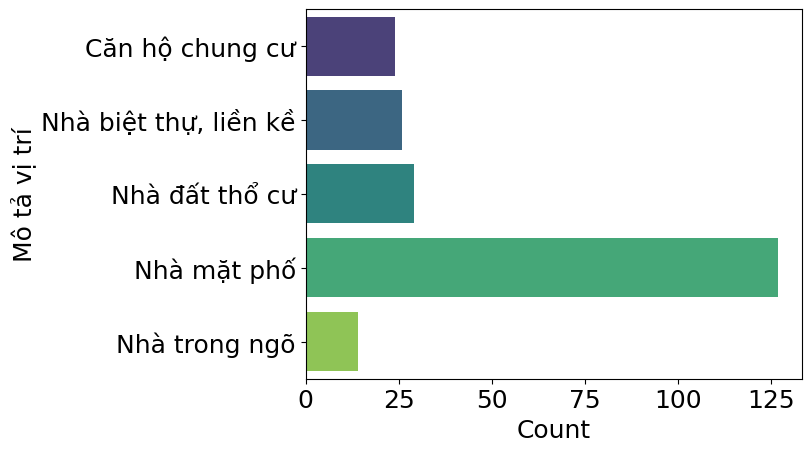

In [13]:
plot = sb.countplot(data=data, y='Mô tả vị trí', hue='Mô tả vị trí', palette='viridis')
plot.set_xlabel('Count', fontsize=18)
plot.set_ylabel('Mô tả vị trí', fontsize=18)

### Dữ liệu raw_data_train đã crawl ngày 10/4/2024

In [3]:
data_train = pd.read_csv("raw_data_train.csv")
data_train

,Giá nhà,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC
0,7.4 Tỷ,100,"Phường An Hải Bắc, Quận Sơn Trà",Nhà mặt phố,5,3.0,2.0
1,212.1 Tỷ,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4242,NaN,NaN
2,2500 Tỷ,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4242,NaN,NaN
3,70 Triệu,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4252,NaN,NaN
4,212.1 Tỷ,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4242,11.0,11.0
...,...,...,...,...,...,...,...
1409,4.6 Tỷ,90,", Quận Sơn Trà",Nhà mặt phố,5,2.0,2.0
1410,3.35 Tỷ,60,", Quận Liên Chiểu",Nhà trong ngõ,4,3.0,3.0
1411,3.4 Tỷ,41,", Quận Thanh Khê",Nhà trong ngõ,4,3.0,3.0
1412,3.99 Tỷ,85,", Quận Liên Chiểu",Nhà mặt phố,5,2.0,2.0
